About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the [dataset about Pokemons](https://www.kaggle.com/datasets/abcsds/pokemon)

In [23]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.sample(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
338,310,Manectric,Electric,NaN,475,70,75,60,105,60,105,3,False
346,317,Swalot,Poison,NaN,467,100,73,83,73,83,55,3,False
530,478,Froslass,Ice,Ghost,480,70,80,70,80,70,110,4,False
435,390,Chimchar,Fire,NaN,309,44,58,44,58,44,61,4,False


# Task 1 (1 point)

Investigate  the type of every feature. Is it numerical or cetegorical (nominal or ordinal)? Explain, why.

You may need to check the type of the column or consult the description of the data on Kaggle.com

In [9]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

**Answer:** 

Numerical: Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed. ***These are all stats that are measured on a scale.***

Categorical Nominal: # (ID), Name, Type 1, Type 2, Legendary. ***These are labels without order.***

Categorical Ordinal: Generation. ***Because it's ordered (1,2,3...).***

***However some might argue that Generation is numerical if you consider it as a time sequence. But in data terms, if it's representing a group with order, it's ordinal. Since each generation is a distinct group, but they follow a specific order, so yes, ordinal.***

# Task 2 (1 point)

It is said in the description of the dataset that `Total` is the sum of the stats after it. Let's check, if it is true.

Create a new column `'New Total'`, what is the sum of `HP, 	Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed`

In [31]:
pokemon['New Total'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
pokemon.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Total
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False,555
556,497,Serperior,Grass,NaN,528,75,75,95,75,95,113,5,False,528
489,441,Chatot,Normal,Flying,411,76,65,45,92,42,91,4,False,411
463,416,Vespiquen,Bug,Flying,474,70,80,102,80,102,40,4,False,474
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False,600


Now, print the number of rows that contain deifferent   `'Total'` and `'New Total'` values and depict these rows.

Hint: compare columns `'Total'` and `'New Total'` and filter rows using the comparison.


In [41]:
difftotals = pokemon.loc[pokemon['Total'] != pokemon['New Total']]
# difftotals = pokemon[pokemon['Total'] != pokemon['New Total']]
print(f"n of different totals: {len(difftotals)}")

n of different totals: 0


# Task 3 (2 points)

Create a frequency table for the `'Type 1'` feature

In [43]:
pokemon['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Also, add proportions and percentage for every type  to the table.

Hint: `Series.to_frame` may be a useful function

In [53]:
pok_type_counts = pokemon['Type 1'].value_counts()
result = pd.DataFrame({
    'Count': pok_type_counts,
    'Proportion': pok_type_counts /len(df),
})
result['Percentage'] = (result['Proportion']*100).round(2).astype(str) + '%'



print(result)

          Count  Proportion Percentage
Type 1                                
Water       112     0.14000      14.0%
Normal       98     0.12250     12.25%
Grass        70     0.08750      8.75%
Bug          69     0.08625      8.62%
Psychic      57     0.07125      7.12%
Fire         52     0.06500       6.5%
Electric     44     0.05500       5.5%
Rock         44     0.05500       5.5%
Dragon       32     0.04000       4.0%
Ground       32     0.04000       4.0%
Ghost        32     0.04000       4.0%
Dark         31     0.03875      3.88%
Poison       28     0.03500       3.5%
Steel        27     0.03375      3.38%
Fighting     27     0.03375      3.38%
Ice          24     0.03000       3.0%
Fairy        17     0.02125      2.12%
Flying        4     0.00500       0.5%


Draw a plot to depict the percentage. Make sure to make labels/ticks readable.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon'),
  Text(15, 0, 'Dark'),
  Text(16, 0, 'Steel'),
  Text(17, 0, 'Flying')])

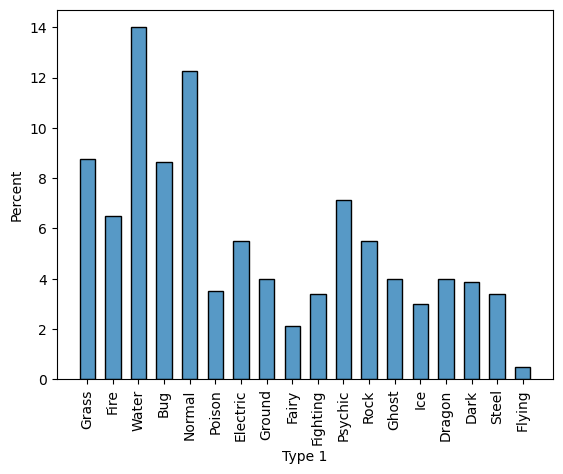

In [71]:
sns.histplot(data=pokemon, x='Type 1', stat='percent', shrink=0.6)

plt.xticks(rotation=90)

Draw conclusions from the plot. (Are there a lot of differnet types? What is the most/least popular type? ...)

**Answer:** 

The most common type is water, with around 14 pokmon, followed closely by normal and grass, each with approximately 12. Mid-range types like fire, bug, poison, electric, ground, fairy, fighting, psychic, rock, and ghost have between 4 to 8 pokemon each, while the least common types—ice, dragon, dark, steel, and flying—are the rarest, each appearing only 2 or fewer times. This uneven distribution suggests a preference for certain types in the pokemon universe, with water, normal, and grass dominating, while others remain niche

# Task 4 (2 points)

Compue the measures of central tendency for the `Sp. Atk` feature

In [107]:
col = 'Sp. Atk'
print(f"mean of Sp. Atk: {pokemon['Sp. Atk'].mean()}")
print(f"median of Sp. Atk: {pokemon['Sp. Atk'].median()}")
print(f"mode (value and count) of Sp. Atk: {pokemon['Sp. Atk'].mode()}")


mean of Sp. Atk: 72.82
median of Sp. Atk: 65.0
mode (value and count) of Sp. Atk: 0    60
Name: Sp. Atk, dtype: int64


Draw a histogram for the feature and depict the measures on it

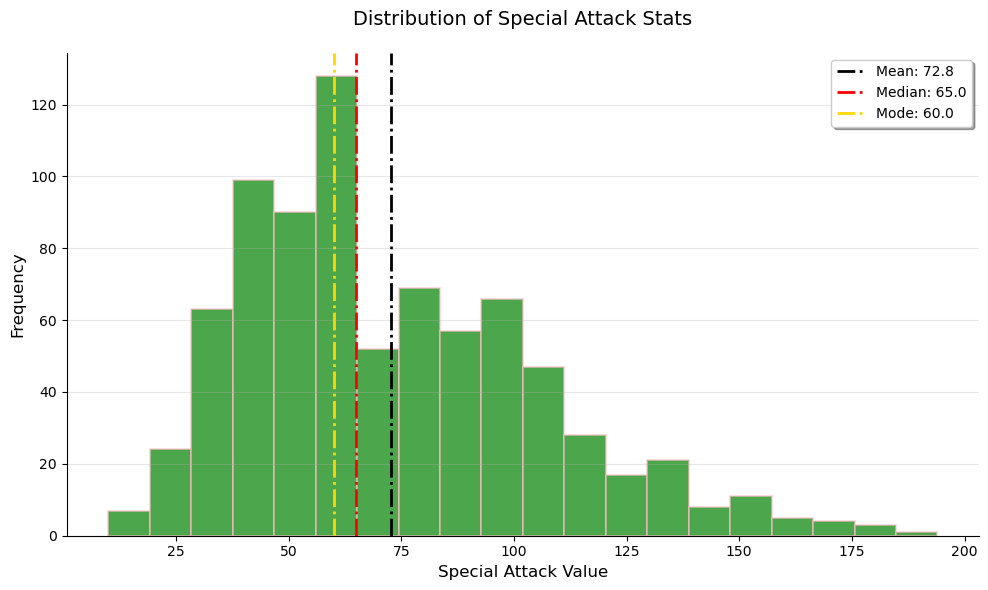

In [149]:
plt.figure(figsize=(10, 6))
plt.hist(pokemon['Sp. Atk'], bins=20, color='green', edgecolor='pink', 
         alpha=0.7, linewidth=1.2, density=False)

mean_val = pokemon['Sp. Atk'].mean()
median_val =pokemon['Sp. Atk'].median()
mode_val = pokemon['Sp. Atk'].mode()[0]

plt.axvline(mean_val, linestyle='-.', c='black', linewidth=2, label=f'Mean: {mean_val:.1f}')
plt.axvline(median_val, linestyle='-.', c='red', linewidth=2, label=f'Median: {median_val:.1f}')
plt.axvline(mode_val, linestyle='-.', c='gold', linewidth=2, label=f'Mode: {mode_val:.1f}')

plt.title('Distribution of Special Attack Stats', fontsize=14, pad=20)
plt.xlabel('Special Attack Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y',alpha=0.3)

plt.legend(loc='upper right', framealpha=1, shadow=True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Is the distribution skewed? Explain your answer.

**Answer:** 
If mean > median > mode, the distribution is right-skewed/positively skewed -- the distribution is right-skewed because the tail extends to the right, indicating that higher values are less frequent and pull the mean above the median



# Task 5 (2 point)

Now, compute measures of central tendencies for legendary and not legendary separately. Is there any difference?

In [124]:
pokemon.groupby('Legendary').agg({'HP': ['mean', 'median'],
    'Attack': ['mean', 'median'],
    'Defense': ['mean', 'median'],
    'Total': ['mean', 'median'],
    'Sp. Atk': ['mean', 'median'],
    'Sp. Def': ['mean', 'median'],
    'Speed': ['mean', 'median']})

HP             Attack           Defense              Total  \
                mean median        mean median       mean median        mean   
Legendary                                                                      
False      67.182313   65.0   75.669388   72.0  71.559184   66.0  417.213605   
True       92.738462   91.0  116.676923  110.0  99.661538  100.0  637.384615   

                     Sp. Atk            Sp. Def              Speed         
          median        mean median        mean median        mean median  
Legendary                                                                  
False      425.0   68.454422   65.0   68.892517   65.0   65.455782   64.0  
True       600.0  122.184615  120.0  105.938462  100.0  100.184615  100.0

**Answer:** 
Yes, there is a clear difference: Legendary pokemon are stronger in every stat category (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, and Total Stats) compared to non-Legendary pokemon



Draw the hisograms on one plot.

Hint: use `hue` in `sns.histplot`

<Axes: xlabel='Total', ylabel='Count'>

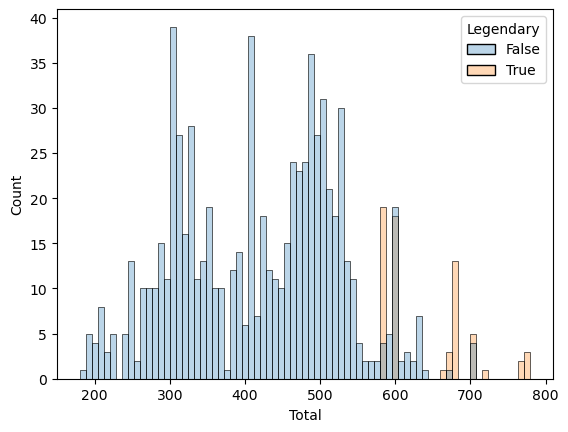

In [143]:
sns.histplot(data=pokemon, x='Total', hue='Legendary', bins=75, alpha=0.3)


<Axes: xlabel='Total', ylabel='Count'>

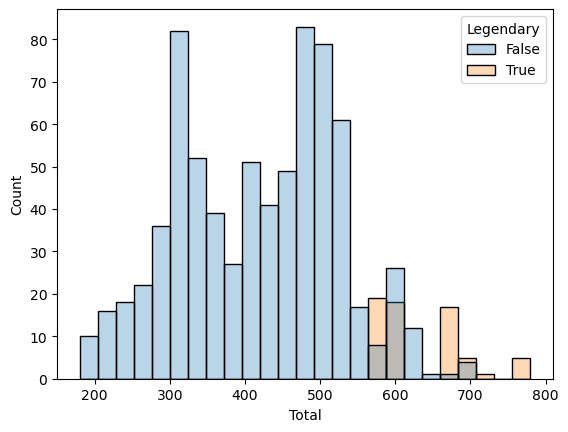

In [145]:
sns.histplot(data=pokemon, x='Total',hue='Legendary', bins=25, alpha=0.3)


# Task 6 (2 point)

There is a problem that bars for legendary pokemons are significantly smaller than the bars for non-legendary. Explain, why is it happening

In [155]:
leg = pokemon[pokemon['Legendary'] == True].shape[0]
non_leg = pokemon[pokemon['Legendary'] == False].shape[0]
total = pokemon.shape[0]
leg_percent = (leg / total) * 100
non_leg_percent = (non_leg / total) * 100

print(f"legendary percent: {leg_percent}%")
print(f"non-legendary percent: {non_leg_percent}%")

legendary percent: 8.125%
non-legendary percent: 91.875%


**Answer:** The gap is quite large -- legendary pokemon account for just 8%, while non-legendary ones dominate at 92%. This reveals a pronounced imbalance in the dataset, now expressed numerically

Fix the histogram (make the bars comparable hights), so it wil be more convenient to compare the distributions.

Hint: consult the [documentation for the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) and find, which optional arguments may help.

<Axes: xlabel='Total', ylabel='Percent'>

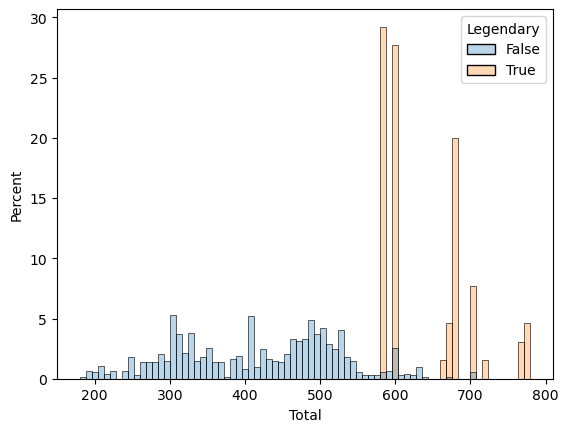

In [160]:
sns.histplot(data= pokemon, x='Total', hue='Legendary', stat='percent', bins=75, alpha=0.3, common_norm=False)

Now, make conclusions about the distributions

**Answer:** 
Instead of using absolute counts, I chose percentages for better clarity. The distribution shows that non-legendary pokemon are predominantly in the 180-650 total stats range, while legendaries mostly occupy the 580-750 range. Strikingly, over 55% of legendary pokemon have stats concentrated between 580 and 620, 30% - between 670 and 720.
